## Downloading and Extracting Data:

In [1]:
!kaggle datasets download -d andrewmvd/ocular-disease-recognition-odir5k


Dataset URL: https://www.kaggle.com/datasets/andrewmvd/ocular-disease-recognition-odir5k
License(s): other
 99% 1.60G/1.62G [00:11<00:00, 164MB/s]
100% 1.62G/1.62G [00:11<00:00, 148MB/s]


In [2]:
import zipfile

with zipfile.ZipFile('ocular-disease-recognition-odir5k.zip', 'r') as zip_ref:
    zip_ref.extractall('odir5k')


In [3]:
ls odir5k

full_df.csv  ODIR-5K/  preprocessed_images/


In [4]:
ls odir5k/ODIR-5K/ODIR-5K/

 data.xlsx  'Testing Images'/  'Training Images'/


## Displaying an Example Image:

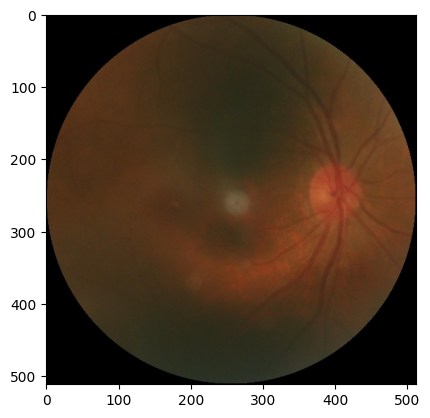

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2

# read the csv file
df = pd.read_csv('odir5k/full_df.csv')
df.head()

# display an image as exemple
img = cv2.imread('odir5k/preprocessed_images/0_right.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


In [6]:
df.head(10)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
5,6,60,Male,6_left.jpg,6_right.jpg,macular epiretinal membrane,moderate non proliferative retinopathy，epireti...,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",6_right.jpg
6,7,60,Female,7_left.jpg,7_right.jpg,drusen,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",7_right.jpg
7,8,59,Male,8_left.jpg,8_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",8_right.jpg
8,9,54,Male,9_left.jpg,9_right.jpg,normal fundus,vitreous degeneration,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['O'],"[0, 0, 0, 0, 0, 0, 0, 1]",9_right.jpg
9,10,70,Male,10_left.jpg,10_right.jpg,epiretinal membrane,normal fundus,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",10_right.jpg


In [7]:
# Filter rows for patient with ID 0
patient_0_df = df[df['ID'] == 0]

# Show rows for patient 0
patient_0_df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
3194,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['C'],"[0, 0, 0, 1, 0, 0, 0, 0]",0_left.jpg


In [8]:
df.shape

(6392, 19)

In [9]:
df = df.drop_duplicates()


In [10]:
df.shape

(6392, 19)

In [11]:
df["target"].unique().size

8

In [12]:
import numpy as np
import json
targets = np.array(df["target"].apply(lambda x: json.loads(x)).tolist())


targets.shape

(6392, 8)

## Filtering and Visualizing Data:

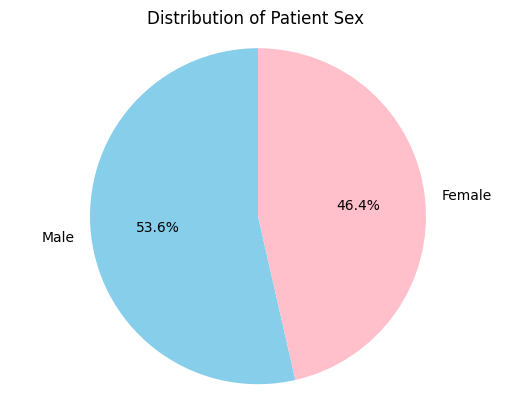

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

gender_counts = df['Patient Sex'].value_counts()
colors=['skyblue','pink']
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90,colors=colors)

plt.title('Distribution of Patient Sex ')

plt.axis('equal')
plt.show()

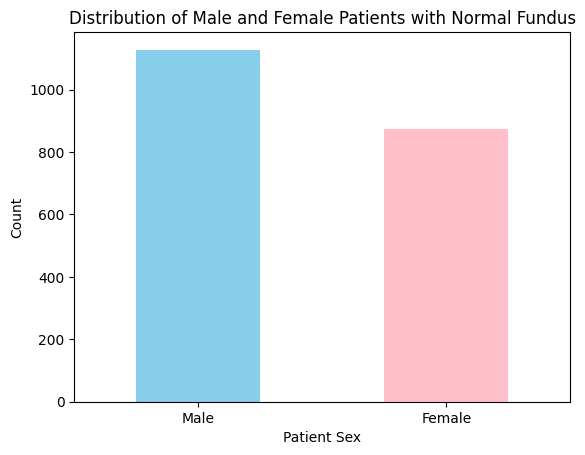

In [14]:
filtered_data = df[(df['Left-Diagnostic Keywords'] == 'normal fundus') & (df['Right-Diagnostic Keywords'] == 'normal fundus')]

gender_counts = filtered_data['Patient Sex'].value_counts()
colors=['skyblue','pink']
gender_counts.plot(kind='bar', rot=0,color=colors)

plt.xlabel('Patient Sex')
plt.ylabel('Count')
plt.title('Distribution of Male and Female Patients with Normal Fundus')

plt.show()

## Class Distribution:

In [15]:
classes = { 0: "Normal",
            1: "Diabetes",
            2: "Glaucoma",
            3: "Cataract",
            4: "Age related Macular Degeneration",
            5: "Hypertension",
            6: "Pathological Myopia",
            7: "Other diseases/abnormalities"
          }

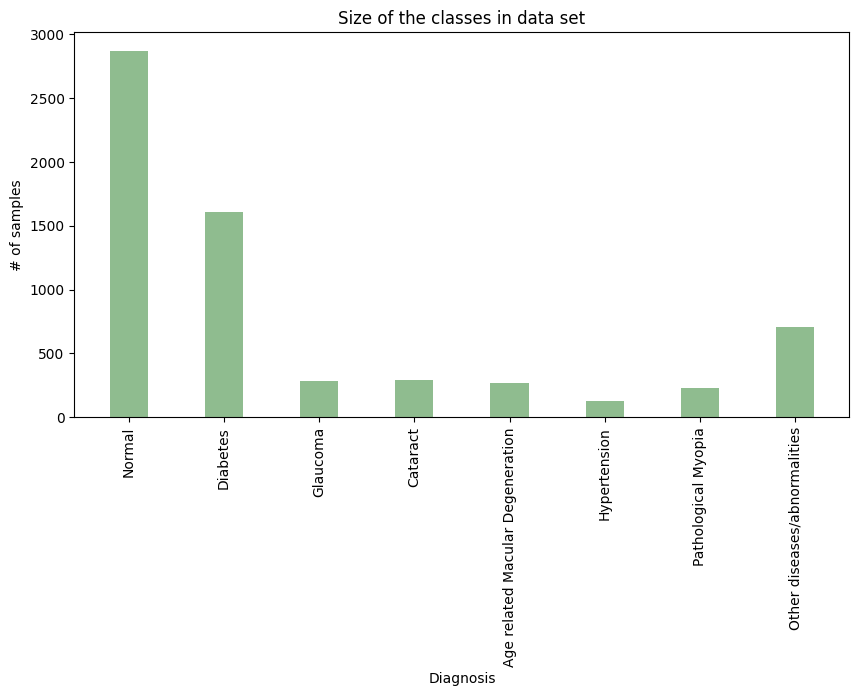

In [16]:
# creating the dataset
data = np.sum(targets, axis=0)

classes_names = list(classes.values())
values = list(data)

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(classes_names, values, color ='darkseagreen',
        width = 0.4)

plt.xlabel("Diagnosis")
plt.ylabel("# of samples")
plt.title("Size of the classes in data set")

plt.xticks(rotation=90)

plt.show()

In [17]:
classes_names

['Normal',
 'Diabetes',
 'Glaucoma',
 'Cataract',
 'Age related Macular Degeneration',
 'Hypertension',
 'Pathological Myopia',
 'Other diseases/abnormalities']

In [18]:
values

[2873, 1608, 284, 293, 266, 128, 232, 708]

## Adding Class Names to DataFrame:

In [19]:
df["class_name"] = np.argmax(targets, axis=1).tolist()
df["class_name"] = df["class_name"] .replace(classes)

df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename,class_name
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg,Normal
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg,Normal
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg,Diabetes
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg,Diabetes
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg,Diabetes


## Image Display by Class:

['2446_left.jpg', '2393_left.jpg', '2890_right.jpg', '1117_left.jpg']
['3957_right.jpg', '3973_right.jpg', '3993_left.jpg', '4144_left.jpg']
['1492_right.jpg', '1266_right.jpg', '1352_right.jpg', '1256_left.jpg']
['2239_right.jpg', '2155_left.jpg', '970_left.jpg', '2234_left.jpg']
['992_right.jpg', '1831_left.jpg', '1154_left.jpg', '164_right.jpg']
['45_left.jpg', '272_left.jpg', '4581_right.jpg', '571_left.jpg']
['1538_left.jpg', '1613_left.jpg', '18_left.jpg', '1543_right.jpg']
['558_right.jpg', '1174_left.jpg', '37_left.jpg', '456_left.jpg']


<ipython-input-20-30498082987f>:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(8, 4, 4 * i + j + 1)


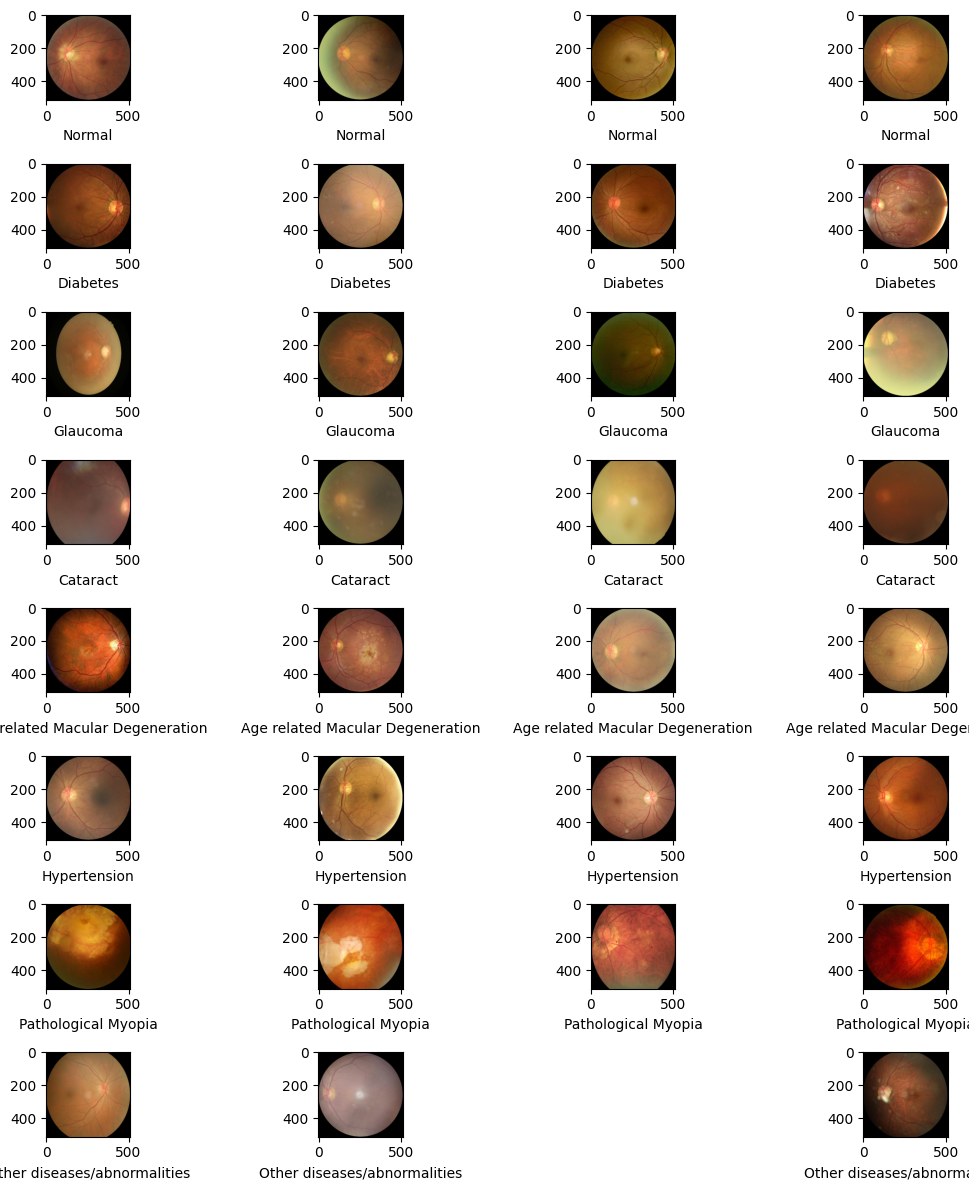

In [20]:
import os
import cv2
import matplotlib.pyplot as plt
img_dir = "/odir5k/preprocessed_images"
plt.figure(figsize=(12, 12))

for i, class_name in enumerate(classes.values()):

    class_subset = df.loc[df.class_name == class_name].sample(n=4)

    img_names = class_subset.filename.to_list()
    print(img_names)
    for j, img in enumerate(img_names):
        image = cv2.imread(os.path.join("./odir5k/preprocessed_images", img))

        ## convert image to RGB
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        ## subplot variables - (# of rows, # of columns, iterate through locations on grid)
        plt.subplot(8, 4, 4 * i + j + 1)
        plt.imshow(image_rgb, aspect=1)

        ## label with filename and diagnosis
        plt.xlabel('{}'.format(class_name))

        plt.tight_layout()

## Generating Dataset:

In [21]:
def has_condn(term,text):
    if term in text:
        return 1
    else:
        return 0

In [22]:
def process_dataset(df):
    # Create 2 more columns labeling them whether right or left cataract
    df["left_cataract"] = df["Left-Diagnostic Keywords"].apply(lambda x: has_condn("cataract", x))
    df["right_cataract"] = df["Right-Diagnostic Keywords"].apply(lambda x: has_condn("cataract", x))

    df["LD"] = df["Left-Diagnostic Keywords"].apply(lambda x: has_condn("non proliferative retinopathy", x))
    df["RD"] = df["Right-Diagnostic Keywords"].apply(lambda x: has_condn("non proliferative retinopathy", x))

    df["LG"] = df["Left-Diagnostic Keywords"].apply(lambda x: has_condn("glaucoma", x))
    df["RG"] = df["Right-Diagnostic Keywords"].apply(lambda x: has_condn("glaucoma", x))

    df["LH"] = df["Left-Diagnostic Keywords"].apply(lambda x: has_condn("hypertensive", x))
    df["RH"] = df["Right-Diagnostic Keywords"].apply(lambda x: has_condn("hypertensive", x))

    df["LM"] = df["Left-Diagnostic Keywords"].apply(lambda x: has_condn("myopia", x))
    df["RM"] = df["Right-Diagnostic Keywords"].apply(lambda x: has_condn("myopia", x))

    df["LA"] = df["Left-Diagnostic Keywords"].apply(lambda x: has_condn("macular degeneration", x))
    df["RA"] = df["Right-Diagnostic Keywords"].apply(lambda x: has_condn("macular degeneration", x))

    df["LO"] = df["Left-Diagnostic Keywords"].apply(lambda x: has_condn("drusen", x))
    df["RO"] = df["Right-Diagnostic Keywords"].apply(lambda x: has_condn("drusen", x))

    # Store the right/left cataract image IDs in an array
    left_cataract_images = df.loc[(df.C == 1) & (df.left_cataract == 1)]["Left-Fundus"].values
    right_cataract_images = df.loc[(df.C == 1) & (df.right_cataract == 1)]["Right-Fundus"].values

    # Store the left/right normal image IDs in an array
    left_normal = df.loc[(df.C == 0) & (df["Left-Diagnostic Keywords"] == "normal fundus")]['Left-Fundus'].sample(350, random_state=42).values
    right_normal = df.loc[(df.C == 0) & (df["Right-Diagnostic Keywords"] == "normal fundus")]['Right-Fundus'].sample(350, random_state=42).values

    # Store the left/right diabetes image IDs
    left_diab = df.loc[(df.C == 0) & (df.LD == 1)]["Left-Fundus"].values
    right_diab = df.loc[(df.C == 0) & (df.RD == 1)]["Right-Fundus"].values

    # Store the left/right glaucoma image IDs
    left_glaucoma = df.loc[(df.C == 0) & (df.LG == 1)]["Left-Fundus"].values
    right_glaucoma = df.loc[(df.C == 0) & (df.RG == 1)]["Right-Fundus"].values

    # Store the left/right hypertension image IDs
    left_hyper = df.loc[(df.C == 0) & (df.LH == 1)]["Left-Fundus"].values
    right_hyper = df.loc[(df.C == 0) & (df.RH == 1)]["Right-Fundus"].values

    # Store the left/right myopia image IDs
    left_myopia = df.loc[(df.C == 0) & (df.LM == 1)]["Left-Fundus"].values
    right_myopia = df.loc[(df.C == 0) & (df.RM == 1)]["Right-Fundus"].values

    # Store the left/right age-related macular degeneration image IDs
    left_age = df.loc[(df.C == 0) & (df.LA == 1)]["Left-Fundus"].values
    right_age = df.loc[(df.C == 0) & (df.RA == 1)]["Right-Fundus"].values

    # Store the left/right drusen image IDs
    left_other = df.loc[(df.C == 0) & (df.LO == 1)]["Left-Fundus"].values
    right_other = df.loc[(df.C == 0) & (df.RO == 1)]["Right-Fundus"].values

    normalones = np.concatenate((left_normal, right_normal), axis=0)
    cataractones = np.concatenate((left_cataract_images, right_cataract_images), axis=0)
    diabones = np.concatenate((left_diab, right_diab), axis=0)
    glaucoma = np.concatenate((left_glaucoma, right_glaucoma), axis=0)
    hyper = np.concatenate((left_hyper, right_hyper), axis=0)
    myopia = np.concatenate((left_myopia, right_myopia), axis=0)
    age = np.concatenate((left_age, right_age), axis=0)
    other = np.concatenate((left_other, right_other), axis=0)

    return normalones, cataractones, diabones, glaucoma, hyper, myopia, age, other


In [25]:
normal , cataract , diab, glaucoma , hyper , myopia , age, other = process_dataset(df);

In [26]:
normal

array(['3332_left.jpg', '4059_left.jpg', '69_left.jpg', '2415_left.jpg',
       '4176_left.jpg', '2711_left.jpg', '4614_left.jpg', '3174_left.jpg',
       '2862_left.jpg', '2424_left.jpg', '3193_left.jpg', '3306_left.jpg',
       '2961_left.jpg', '2425_left.jpg', '2858_left.jpg', '3180_left.jpg',
       '2668_left.jpg', '2659_left.jpg', '2336_left.jpg', '277_left.jpg',
       '2897_left.jpg', '1151_left.jpg', '3011_left.jpg', '3083_left.jpg',
       '4059_left.jpg', '4576_left.jpg', '2563_left.jpg', '2549_left.jpg',
       '3025_left.jpg', '2330_left.jpg', '2562_left.jpg', '3438_left.jpg',
       '3047_left.jpg', '3150_left.jpg', '570_left.jpg', '2430_left.jpg',
       '2532_left.jpg', '3426_left.jpg', '2475_left.jpg', '3214_left.jpg',
       '1253_left.jpg', '2819_left.jpg', '3415_left.jpg', '2973_left.jpg',
       '2488_left.jpg', '2349_left.jpg', '3025_left.jpg', '3125_left.jpg',
       '160_left.jpg', '2999_left.jpg', '2886_left.jpg', '3179_left.jpg',
       '1021_left.jpg', '3410_

In [27]:
normal , cataract , diab, glaucoma , hyper , myopia , age, other = process_dataset(df)

print("Dataset stats::")
print("Normal ::" , len(normal))
print("Cataract ::" , len(cataract))
print("Diabetes ::" , len(diab))
print("Glaucoma ::" , len(glaucoma))
print("Hypertension ::" , len(hyper))
print("Myopia ::" , len(myopia))
print("Age Issues ::" , len(age))
print("Other ::" , len(other))

Dataset stats::
Normal :: 700
Cataract :: 594
Diabetes :: 1818
Glaucoma :: 610
Hypertension :: 374
Myopia :: 479
Age Issues :: 551
Other :: 324


In [28]:
import os
import cv2
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import numpy as np
from tensorflow.keras.preprocessing.image import load_img,img_to_array
dataset_dir = "./odir5k/preprocessed_images"
image_size=224
labels = []
dataset = []
def dataset_generator(imagecategory , label):
    for img in tqdm(imagecategory):
        imgpath = os.path.join(dataset_dir,img);

        #now we try to read the image and resize it accordingly
        try:
            image = cv2.imread(imgpath,cv2.IMREAD_COLOR)
            image = cv2.resize(image,(image_size,image_size))
        except:
            continue;
        dataset.append([np.array(image),np.array(label)]);
    random.shuffle(dataset);

    return dataset;

In [29]:
# Normal == 0
# Cataract == 1
# Diabetes == 2
# Glaucoma == 3
# HyperTension == 4
# Myopia == 5
# Age == 6
# Other == 7

dataset = dataset_generator(normal,0)
dataset = dataset_generator(cataract,1)
dataset = dataset_generator(diab,2)
dataset = dataset_generator(glaucoma,3)
dataset = dataset_generator(hyper,4)
dataset = dataset_generator(myopia,5)
dataset = dataset_generator(age,6)
dataset = dataset_generator(other,7)

len(dataset)

100%|██████████| 324/324 [00:00<00:00, 536.35it/s]


5396

## Splitting the Data :

In [30]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
# Prepare dataset
train_x = np.array([i[0] for i in dataset]).reshape(-1, image_size, image_size, 3)
train_y = np.array([i[1] for i in dataset])

# Split the dataset
x_train, x_temp, y_train, y_temp = train_test_split(train_x, train_y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# One-hot encode the labels
y_train_cat = to_categorical(y_train, num_classes=8)
y_val_cat = to_categorical(y_val, num_classes=8)
y_test_cat = to_categorical(y_test, num_classes=8)

In [31]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization
import tensorflow as tf

# Load VGG19 without the top layer and set the input size
vgg = VGG19(weights="imagenet", include_top=False, input_shape=(image_size, image_size, 3))

# Freeze the VGG19 layers
for layer in vgg.layers:
    layer.trainable = False

# Create the model
model = Sequential([
    vgg,
    Flatten(),
    Dense(256, activation="relu"),
    BatchNormalization(),
    Dense(256, activation="relu"),
    BatchNormalization(),
    Dense(8, activation="softmax")  # 8 classes as per your data
])

model.summary()


80134624/80134624 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 batch_normalization_1 (Bat  (None, 256)               10

In [32]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=8)
y_val = to_categorical(y_val, num_classes=8)
y_test = to_categorical(y_test, num_classes=8)

# Check the new shape of y_train
print(y_train.shape)  # Should be (4474, 8)


(3777, 8)


In [33]:
import numpy as np

# Convert lists to NumPy arrays
X_train = np.array(x_train)
y_train = np.array(y_train)
X_val = np.array(x_val)
y_val = np.array(y_val)

# Check the shapes
print(X_train.shape)  # Should be (number_of_images, 224, 224, 3)
print(y_train.shape)  # Should be (number_of_images, 8)


(3777, 224, 224, 3)
(3777, 8)


In [34]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Epoch 1/10
119/119 [==============================] - 98s 815ms/step - loss: 1.4138 - accuracy: 0.5314 - val_loss: 1.9731 - val_accuracy: 0.4574
Epoch 2/10
119/119 [==============================] - 97s 813ms/step - loss: 0.7278 - accuracy: 0.7630 - val_loss: 1.3915 - val_accuracy: 0.5760
Epoch 3/10
119/119 [==============================] - 96s 808ms/step - loss: 0.4746 - accuracy: 0.8517 - val_loss: 1.1867 - val_accuracy: 0.6675
Epoch 4/10
119/119 [==============================] - 96s 811ms/step - loss: 0.3496 - accuracy: 0.9023 - val_loss: 1.0898 - val_accuracy: 0.7095
Epoch 5/10
119/119 [==============================] - 96s 807ms/step - loss: 0.2820 - accuracy: 0.9208 - val_loss: 1.1349 - val_accuracy: 0.7157
Epoch 6/10
119/119 [==============================] - 95s 803ms/step - loss: 0.2381 - accuracy: 0.9367 - val_loss: 1.1288 - val_accuracy: 0.7478
Epoch 7/10
119/119 [==============================] - 96s 810ms/step - loss: 0.1876 - accuracy: 0.9449 - val_loss: 1.1072 - val_ac

In [35]:
print(len(x_test))  # Number of test images
print(len(y_test))  # Number of test labels


810
810


In [36]:
test_loss, test_accuracy = model.evaluate(np.array(x_test), np.array(y_test))
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


26/26 [==============================] - 18s 675ms/step - loss: 1.2767 - accuracy: 0.7099
Test Accuracy: 70.99%


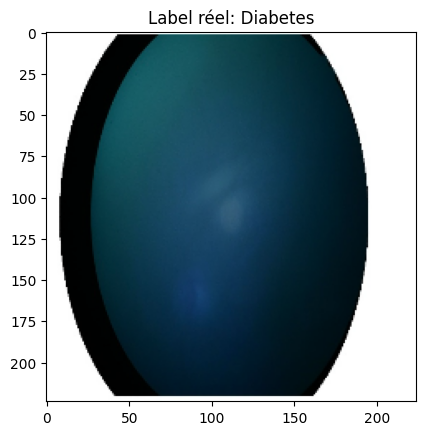

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Select a random index
random_index = np.random.randint(0, len(x_test))

# Get the image and the corresponding true label
image = x_test[random_index]
real_label = y_test[random_index]

# Extract the index of the true label (assuming one-hot encoded labels)
real_label_index = np.argmax(real_label)

# Display the image with its true label
plt.imshow(image)
plt.title(f"Label réel: {classes[real_label_index]}")
plt.show()


In [38]:
image.shape

(224, 224, 3)

In [39]:
import numpy as np

# Add an extra dimension to the image to match the model's input shape
image = np.expand_dims(image, axis=0)  # Ensure shape is (1, 224, 224, 3)

# Ensure the image has the correct shape
print("Shape of the image before prediction:", image.shape)

# Make a prediction using the model
prediction = model.predict(image)

# Find the predicted class index
predicted_class = np.argmax(prediction, axis=1)[0]

# Convert the true label to its corresponding index
real_label_index = np.argmax(real_label)

# Display the results
print(f"Label réel: {classes[real_label_index]}")
print(f"Label prédit: {classes[predicted_class]}")


Shape of the image before prediction: (1, 224, 224, 3)
1/1 [==============================] - 0s 309ms/step
Label réel: Diabetes
Label prédit: Diabetes


In [40]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
# y_pred = np.array((model.predict(x_test) > 0.5).astype("int32"))

y_pred = []
for i in model.predict(x_test):
    y_pred.append(np.argmax(np.array(i)).astype("int32"))

print(y_pred)

26/26 [==============================] - 17s 664ms/step
[2, 7, 1, 4, 6, 5, 3, 2, 1, 4, 3, 2, 1, 1, 2, 6, 3, 0, 2, 7, 2, 1, 6, 2, 1, 5, 5, 7, 2, 6, 3, 1, 3, 7, 7, 1, 7, 2, 4, 5, 2, 4, 2, 4, 4, 1, 2, 2, 4, 6, 2, 2, 0, 4, 2, 2, 2, 2, 2, 5, 4, 1, 2, 3, 2, 2, 1, 5, 3, 2, 0, 2, 3, 2, 5, 6, 2, 3, 4, 0, 1, 0, 2, 0, 6, 3, 6, 3, 3, 1, 3, 6, 6, 3, 6, 3, 1, 6, 2, 2, 6, 2, 2, 2, 6, 7, 6, 5, 6, 1, 6, 3, 0, 4, 2, 2, 5, 2, 3, 4, 0, 4, 2, 5, 3, 2, 2, 3, 0, 4, 3, 3, 6, 2, 2, 1, 2, 6, 2, 4, 2, 2, 6, 2, 2, 4, 4, 5, 5, 6, 6, 5, 3, 2, 4, 3, 1, 2, 0, 6, 3, 3, 7, 2, 2, 6, 1, 1, 1, 6, 1, 0, 0, 2, 1, 7, 0, 6, 6, 2, 3, 5, 4, 6, 1, 3, 2, 6, 6, 6, 6, 1, 2, 2, 0, 0, 7, 2, 2, 6, 4, 0, 2, 2, 1, 2, 0, 2, 7, 7, 4, 2, 1, 5, 2, 1, 1, 2, 4, 2, 0, 4, 0, 7, 4, 2, 3, 2, 2, 7, 5, 2, 3, 2, 2, 0, 5, 0, 3, 5, 6, 2, 0, 2, 2, 0, 2, 1, 5, 2, 0, 3, 7, 4, 2, 6, 2, 5, 6, 0, 0, 5, 2, 2, 6, 6, 7, 0, 2, 3, 2, 4, 2, 6, 2, 2, 2, 2, 5, 6, 3, 2, 3, 3, 7, 2, 3, 3, 1, 7, 2, 2, 5, 7, 4, 4, 2, 2, 6, 1, 2, 1, 2, 2, 4, 4, 4, 4, 7, 3, 4, 6, 2, 3, 6

In [41]:
model.save('ocular_disease_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [42]:
# Convert y_test from one-hot encoding to class labels
y_test_labels = np.argmax(y_test, axis=1)

# Now calculate the accuracy
print(accuracy_score(y_test_labels, y_pred))


0.7098765432098766


26/26 [==============================] - 17s 660ms/step
[2, 7, 1, 4, 6, 5, 3, 2, 1, 4, 3, 2, 1, 1, 2, 6, 3, 0, 2, 7, 2, 1, 6, 2, 1, 5, 5, 7, 2, 6, 3, 1, 3, 7, 7, 1, 7, 2, 4, 5, 2, 4, 2, 4, 4, 1, 2, 2, 4, 6, 2, 2, 0, 4, 2, 2, 2, 2, 2, 5, 4, 1, 2, 3, 2, 2, 1, 5, 3, 2, 0, 2, 3, 2, 5, 6, 2, 3, 4, 0, 1, 0, 2, 0, 6, 3, 6, 3, 3, 1, 3, 6, 6, 3, 6, 3, 1, 6, 2, 2, 6, 2, 2, 2, 6, 7, 6, 5, 6, 1, 6, 3, 0, 4, 2, 2, 5, 2, 3, 4, 0, 4, 2, 5, 3, 2, 2, 3, 0, 4, 3, 3, 6, 2, 2, 1, 2, 6, 2, 4, 2, 2, 6, 2, 2, 4, 4, 5, 5, 6, 6, 5, 3, 2, 4, 3, 1, 2, 0, 6, 3, 3, 7, 2, 2, 6, 1, 1, 1, 6, 1, 0, 0, 2, 1, 7, 0, 6, 6, 2, 3, 5, 4, 6, 1, 3, 2, 6, 6, 6, 6, 1, 2, 2, 0, 0, 7, 2, 2, 6, 4, 0, 2, 2, 1, 2, 0, 2, 7, 7, 4, 2, 1, 5, 2, 1, 1, 2, 4, 2, 0, 4, 0, 7, 4, 2, 3, 2, 2, 7, 5, 2, 3, 2, 2, 0, 5, 0, 3, 5, 6, 2, 0, 2, 2, 0, 2, 1, 5, 2, 0, 3, 7, 4, 2, 6, 2, 5, 6, 0, 0, 5, 2, 2, 6, 6, 7, 0, 2, 3, 2, 4, 2, 6, 2, 2, 2, 2, 5, 6, 3, 2, 3, 3, 7, 2, 3, 3, 1, 7, 2, 2, 5, 7, 4, 4, 2, 2, 6, 1, 2, 1, 2, 2, 4, 4, 4, 4, 7, 3, 4, 6, 2, 3, 6

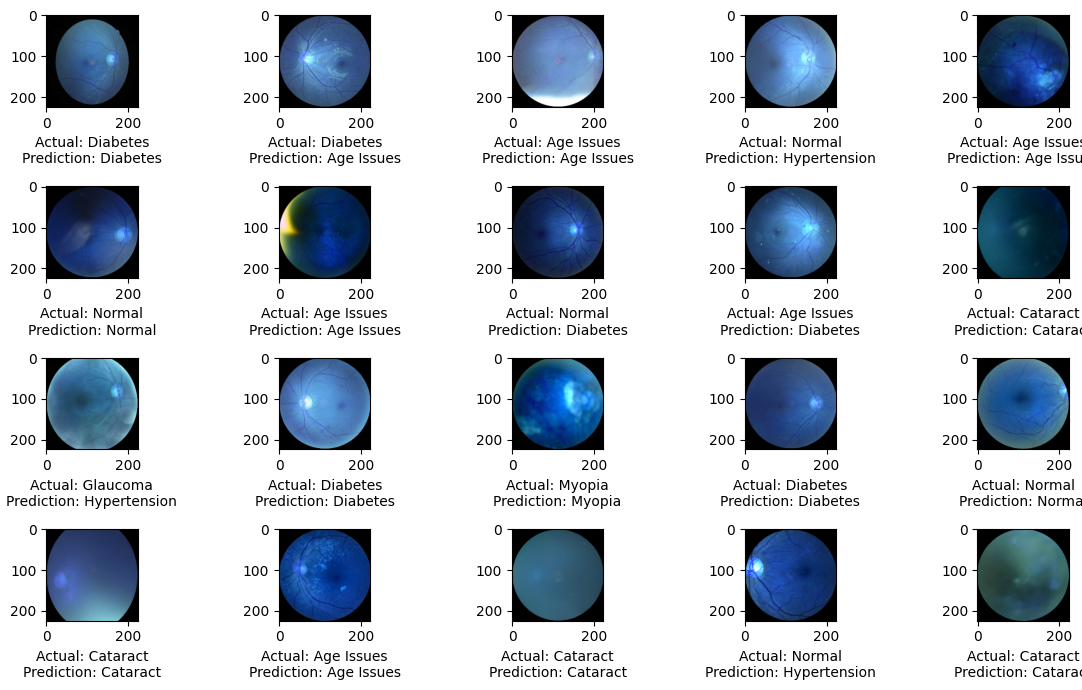

In [43]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# y_pred = np.array((model.predict(x_test) > 0.5).astype("int32"))

y_pred = []
for i in model.predict(x_test):
    y_pred.append(np.argmax(np.array(i)).astype("int32"))

print(y_pred)
plt.figure(figsize=(12,7))
for i in range(20):
    sample = random.choice(range(len(x_test)))
    image = x_test[sample]
    category = np.argmax(y_test[sample])  # Convert to a single integer
    pred_category = y_pred[sample]

    if category == 0:
        label = "Normal"
    elif category == 1:
        label = "Cataract"
    elif category == 2:
        label = "Diabetes"
    elif category == 3:
        label = "Glaucoma"
    elif category == 4:
        label = "Hypertension"
    elif category == 5:
        label = "Myopia"
    elif category == 6:
        label = "Age Issues"
    else:
        label = "Other"

    if pred_category == 0:
        pred_label = "Normal"
    elif pred_category == 1:
        pred_label = "Cataract"
    elif pred_category == 2:
        pred_label = "Diabetes"
    elif pred_category == 3:
        pred_label = "Glaucoma"
    elif pred_category == 4:
        pred_label = "Hypertension"
    elif pred_category == 5:
        pred_label = "Myopia"
    elif pred_category == 6:
        pred_label = "Age Issues"
    else:
        pred_label = "Other"

    plt.subplot(4, 5, i + 1)
    plt.imshow(image)
    plt.xlabel(f"Actual: {label}\nPrediction: {pred_label}")
plt.tight_layout()


In [44]:
from google.colab import drive
drive.mount('/content/drive')

# Save the model to Google Drive
model.save('/content/drive/My Drive/ocular_disease_model.h5')


Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
